In [2]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib import rcParams
from cmocean import cm
import oceansdb

In [3]:
pl.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['legend.fontsize'] = 16

In [5]:
d_ = pd.read_pickle('/accounts/ekarakoy/DATA/NOMAD/dfNomadRaw.pkl')

In [6]:
d_.filter(regex='a.*[0-9]+').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 80 columns):
ap405    4459 non-null object
ap411    4459 non-null object
ap443    4459 non-null object
ap455    4459 non-null object
ap465    4459 non-null object
ap489    4459 non-null object
ap510    4459 non-null object
ap520    4459 non-null object
ap530    4459 non-null object
ap550    4459 non-null object
ap555    4459 non-null object
ap560    4459 non-null object
ap565    4459 non-null object
ap570    4459 non-null object
ap590    4459 non-null object
ap619    4459 non-null object
ap625    4459 non-null object
ap665    4459 non-null object
ap670    4459 non-null object
ap683    4459 non-null object
ad405    4459 non-null object
ad411    4459 non-null object
ad443    4459 non-null object
ad455    4459 non-null object
ad465    4459 non-null object
ad489    4459 non-null object
ad510    4459 non-null object
ad520    4459 non-null object
ad530    4459 non-null object
ad550    4459 non-null 

In [7]:
lw_cols = d_.filter(regex='lw').columns.tolist()
es_cols = d_.filter(regex='es').columns.tolist()
rrs_cols = ['rrs%s' %band[2:] for band in lw_cols]

In [8]:
assert len(lw_cols) == len(es_cols) == len(rrs_cols)

In [9]:
df_rrs = pd.DataFrame(columns=rrs_cols)
for rrs, lw, es in zip(rrs_cols, lw_cols, es_cols):
    df_rrs[rrs] = d_[lw].astype('f8') / d_[es].astype('f8')

In [10]:
df_rrs[df_rrs<0] = np.NaN
df_rrs[df_rrs==1] = np.NaN
df_rrs.insert(0, 'id', d_.id)

In [11]:
df_rrs.min().value_counts()

0.000000     5
0.000051     1
0.000079     1
0.000896     1
0.000183     1
0.000600     1
0.001216     1
0.000251     1
0.001000     1
0.000229     1
0.000284     1
0.000533     1
0.000800     1
0.000261     1
0.000190     1
0.000379     1
10.000000    1
dtype: int64

In [12]:
df_rrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 21 columns):
id        4459 non-null object
rrs405    12 non-null float64
rrs411    4293 non-null float64
rrs443    4456 non-null float64
rrs455    393 non-null float64
rrs465    375 non-null float64
rrs489    4422 non-null float64
rrs510    3435 non-null float64
rrs520    1559 non-null float64
rrs530    1589 non-null float64
rrs550    912 non-null float64
rrs555    3255 non-null float64
rrs560    1193 non-null float64
rrs565    1884 non-null float64
rrs570    816 non-null float64
rrs590    690 non-null float64
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
dtypes: float64(20), object(1)
memory usage: 731.6+ KB


In [13]:
df_rrs.tail().T

,4454,4455,4456,4457,4458
id,6901,6902,6914,6903,6915
rrs405,NaN,NaN,NaN,NaN,NaN
rrs411,0.00109978,0.00179985,0.00270028,0.00070068,0.000699996
rrs443,0.00139999,0.00189976,0.00299982,0.000800468,0.00090064
rrs455,NaN,NaN,NaN,NaN,NaN
rrs465,NaN,NaN,NaN,NaN,NaN
rrs489,0.00220024,0.0023003,0.0037003,0.00110013,0.00140013
rrs510,0.00240025,0.00229985,0.00329987,0.00119948,0.00159922
rrs520,0.00260035,0.00240002,0.00309999,0.0012998,0.00179921
rrs530,0.00290029,0.00260018,0.00310025,0.00140037,0.00210058


In [14]:
df_absorption = d_.filter(regex='a.*[0-9]+').astype('f8')
df_absorption[df_absorption<0] = np.NaN
df_absorption.insert(0, 'id', d_.id)
df_absorption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 81 columns):
id       4459 non-null object
ap405    1269 non-null float64
ap411    1272 non-null float64
ap443    1279 non-null float64
ap455    1279 non-null float64
ap465    1279 non-null float64
ap489    1278 non-null float64
ap510    1278 non-null float64
ap520    1277 non-null float64
ap530    1277 non-null float64
ap550    1267 non-null float64
ap555    1262 non-null float64
ap560    1253 non-null float64
ap565    1245 non-null float64
ap570    1241 non-null float64
ap590    1250 non-null float64
ap619    1259 non-null float64
ap625    1258 non-null float64
ap665    1270 non-null float64
ap670    1270 non-null float64
ap683    1268 non-null float64
ad405    1228 non-null float64
ad411    1231 non-null float64
ad443    1238 non-null float64
ad455    1238 non-null float64
ad465    1238 non-null float64
ad489    1237 non-null float64
ad510    1237 non-null float64
ad520    1236 non-null flo

In [15]:
df_backscatter = d_.filter(regex='b.*[0-9]+').astype('f8')
df_backscatter[df_backscatter<0] = np.NaN
df_backscatter.insert(0, 'id', d_.id)
df_backscatter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 35 columns):
id        4459 non-null object
bb405     369 non-null float64
bb411     369 non-null float64
bb443     369 non-null float64
bb455     369 non-null float64
bb465     369 non-null float64
bb489     369 non-null float64
bb510     369 non-null float64
bb520     369 non-null float64
bb530     381 non-null float64
bb550     369 non-null float64
bb555     369 non-null float64
bb560     369 non-null float64
bb565     369 non-null float64
bb570     369 non-null float64
bb590     369 non-null float64
bb619     369 non-null float64
bb625     369 non-null float64
bb665     369 non-null float64
bb670     369 non-null float64
bb683     369 non-null float64
bbr420    33 non-null float64
bbr442    247 non-null float64
bbr470    314 non-null float64
bbr488    55 non-null float64
bbr510    139 non-null float64
bbr514    70 non-null float64
bbr532    107 non-null float64
bbr550    33 non-null float6

In [16]:
def fill_chl(row):
    if np.isnan(row.hplc_chl):
        return row.fluo_chl
    else:
        return row.hplc_chl

In [26]:
rrs_cols = [col for col in df_rrs.columns if 'rrs' in col]
aop_cols_x = ['id', 'datetime']
aop_cols_x_floats = ['lat', 'lon', 'etopo2', 'oisst',
                   'wtemp', 'sal']
aop_cols_y_floats = ['fluo_chl', 'hplc_chl']
d_cols_x = ['id', 'Datetime']
d_cols_x_floats = ['lat' ,'lon', 'etopo2', 'oisst', 'wt', 'sal']
d_cols_y_floats = ['chl', 'chl_a']
d_aop = pd.DataFrame(columns=aop_cols_x + aop_cols_x_floats +
                     rrs_cols + aop_cols_y_floats)
d_aop[aop_cols_x] = d_[d_cols_x]
d_aop[aop_cols_x_floats] = d_[d_cols_x_floats].astype('f8')
d_aop[rrs_cols] = df_rrs[rrs_cols]
d_aop[aop_cols_y_floats] = d_[d_cols_y_floats].astype('f8')

In [28]:
d_aop[d_aop==-999] = np.NaN

In [29]:
d_aop.head().T

,0,1,2,3,4
id,1565,1566,1567,1568,1559
datetime,2003-04-15 15:15:00,2003-04-15 16:50:00,2003-04-15 17:50:00,2003-04-17 18:15:00,2003-07-21 18:27:00
lat,38.4279,38.368,38.3074,38.6367,38.3047
lon,-76.61,-76.5,-76.44,-76.32,-76.44
etopo2,0,0,1,3,1
oisst,3.7,3.7,3.7,3.7,22.03
wtemp,NaN,NaN,NaN,NaN,NaN
sal,NaN,NaN,NaN,NaN,NaN
rrs405,NaN,NaN,NaN,NaN,NaN
rrs411,0.0012044,0.00106171,0.000971132,0.0014718,0.000905091


In [30]:
d_aop['chl'] = d_aop.apply(fill_chl, axis=1)

In [31]:
d_aop.insert(d_aop.shape[1]-3, 'is_hplc', ~d_aop.hplc_chl.isnull())

In [32]:
d_aop.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,4459.0,1.868658,44.765125,-77.035600,-61.299000,27.093000,34.458500,79.690000
lon,4459.0,-61.592062,53.894958,-179.955000,-82.699950,-67.675000,-63.961500,179.907000
etopo2,4459.0,1312.346715,1766.435289,0.000000,18.000000,240.000000,2789.500000,7978.000000
oisst,4459.0,14.841534,10.374969,-1.800000,1.860000,16.380000,24.430000,30.890000
wtemp,1235.0,18.021513,8.203662,-1.880000,13.425000,18.090000,24.441000,36.250000
sal,672.0,28.717463,8.397708,0.080000,24.885000,33.250000,33.630000,37.010000
rrs405,12.0,0.006333,0.003972,0.001216,0.001838,0.006932,0.009987,0.011736
rrs411,4293.0,0.004881,0.003447,0.000051,0.002509,0.003984,0.006301,0.030600
rrs443,4456.0,0.004652,0.003002,0.000190,0.002617,0.003899,0.006076,0.036769
rrs455,393.0,0.003223,0.002901,0.000229,0.001604,0.002523,0.003985,0.040897


In [33]:
d_aop.tail().T

,4454,4455,4456,4457,4458
id,6901,6902,6914,6903,6915
datetime,2006-10-05 15:40:00,2006-10-05 17:00:00,2006-10-05 18:10:00,2006-10-05 20:30:00,2006-10-05 21:22:00
lat,26.3795,26.3167,26.2545,26.5184,26.5567
lon,-82.2707,-82.4491,-82.6158,-82.5594,-82.4766
etopo2,26,22,24,24,18
oisst,28.91,28.91,28.91,28.91,28.91
wtemp,NaN,NaN,NaN,NaN,NaN
sal,NaN,NaN,NaN,NaN,NaN
rrs405,NaN,NaN,NaN,NaN,NaN
rrs411,0.00109978,0.00179985,0.00270028,0.00070068,0.000699996


In [34]:
d_aop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 32 columns):
id          4459 non-null object
datetime    4459 non-null datetime64[ns]
lat         4459 non-null float64
lon         4459 non-null float64
etopo2      4459 non-null float64
oisst       4459 non-null float64
wtemp       1235 non-null float64
sal         672 non-null float64
rrs405      12 non-null float64
rrs411      4293 non-null float64
rrs443      4456 non-null float64
rrs455      393 non-null float64
rrs465      375 non-null float64
rrs489      4422 non-null float64
rrs510      3435 non-null float64
rrs520      1559 non-null float64
rrs530      1589 non-null float64
rrs550      912 non-null float64
rrs555      3255 non-null float64
rrs560      1193 non-null float64
rrs565      1884 non-null float64
rrs570      816 non-null float64
rrs590      690 non-null float64
rrs619      883 non-null float64
rrs625      1884 non-null float64
rrs665      2641 non-null float64
rrs670      

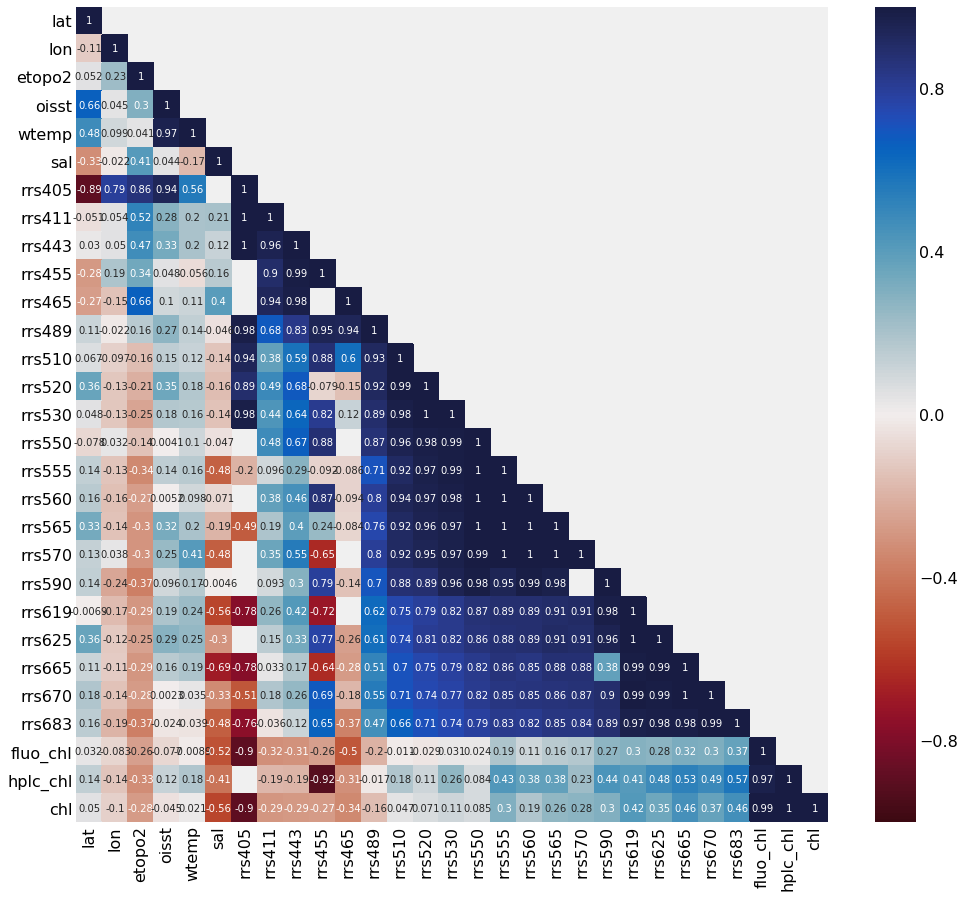

In [35]:
corr_columns = ['lat', 'lon', 'etopo2', 'oisst', 'wtemp', 'sal'] +\
               [col for col in d_aop.columns.tolist() if 'rrs' in col] +\
               ['fluo_chl', 'hplc_chl', 'chl']
f, ax = pl.subplots(figsize=(15,15))
sb.heatmap(d_aop[corr_columns].corr(), ax=ax, annot=True,
           mask=np.triu(np.ones([len(corr_columns)]*2), k=1),
           cmap=cm.balance_r, vmin=-1, vmax=1);    

Taking a look at what the data would look like as is for an OC4 evaluation

In [38]:
df_oc4 = pd.DataFrame(columns=['id', 'maxBlue', 'mxBlId', 'mxBl2Gr', 'mxBl2Gr_log',
                              'chl', 'chl_log'])
df_oc4['maxBlue'] = d_aop.loc[:, ['rrs443','rrs489','rrs510']].max(axis=1)
df_oc4['mxBl2Gr'] = df_oc4.maxBlue / d_aop.rrs555
df_oc4['id'] = d_aop.id
df_oc4['mxBlId'] = d_aop.loc[:, ['rrs443', 'rrs489', 'rrs510']].idxmax(axis=1)
df_oc4['mxBl2Gr_log'] = np.log10(df_oc4.mxBl2Gr)
df_oc4['chl'] = d_aop.chl
df_oc4['chl_log'] = np.log10(df_oc4.chl)

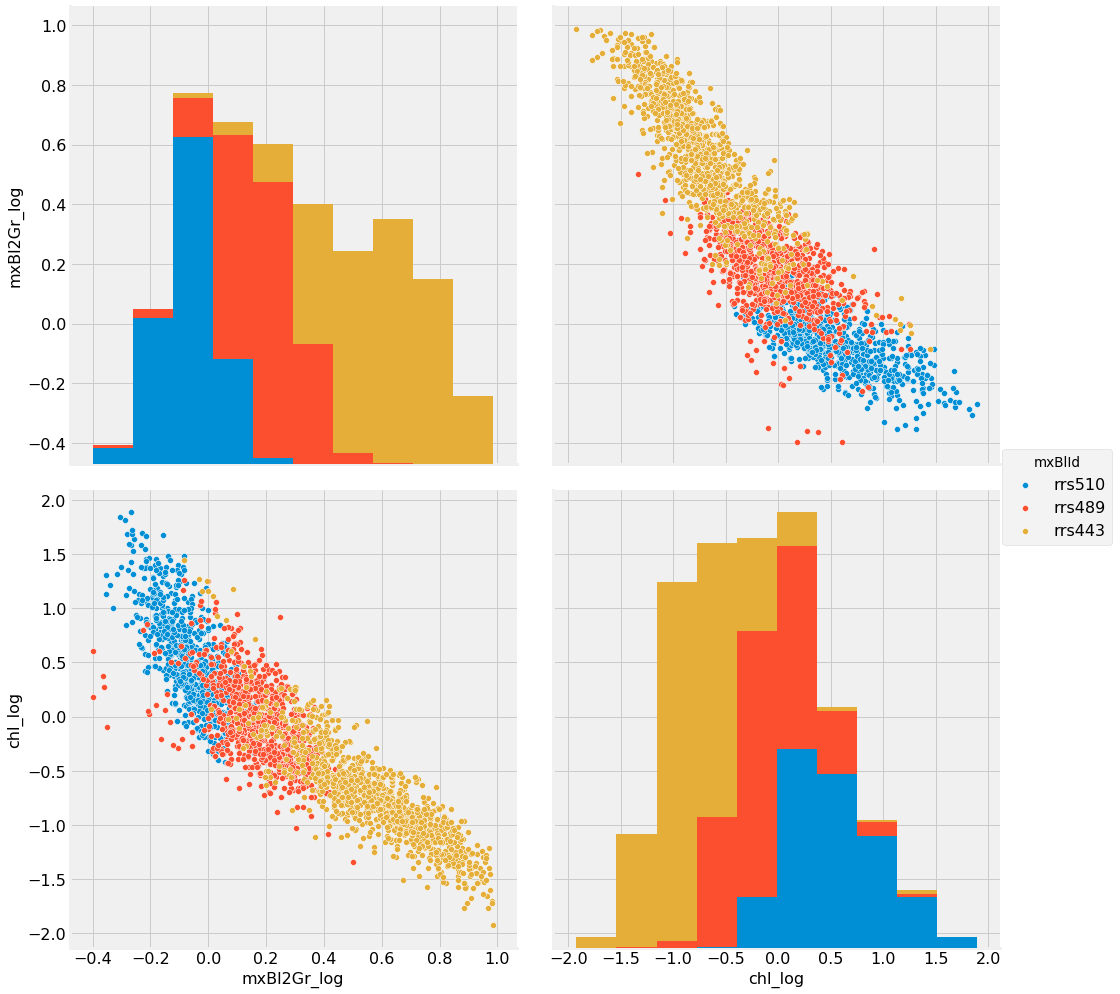

In [39]:
sb.pairplot(df_oc4[['mxBlId', 'mxBl2Gr_log', 'chl_log']].dropna(),
            size=7, hue='mxBlId')

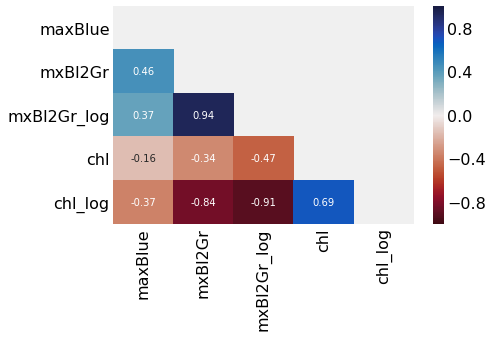

In [40]:
sb.heatmap(df_oc4.drop(['id', 'mxBlId'], axis=1).corr(),
           annot=True, cmap=cm.balance_r,
           mask=np.triu(np.ones([df_oc4.shape[1]-2]*2)),
           vmin=-1, vmax=1);

In [41]:
d_aop.to_pickle('./pickleJar/dfNomad_AOP.pkl')

In [42]:
d_aop.insert(2, 'doy', d_aop.datetime.dt.dayofyear +
             d_aop.datetime.dt.hour/24 + d_aop.datetime.dt.minute/60)

In [43]:
d_aop.head().T

,0,1,2,3,4
id,1565,1566,1567,1568,1559
datetime,2003-04-15 15:15:00,2003-04-15 16:50:00,2003-04-15 17:50:00,2003-04-17 18:15:00,2003-07-21 18:27:00
doy,105.875,106.5,106.542,108,203.2
lat,38.4279,38.368,38.3074,38.6367,38.3047
lon,-76.61,-76.5,-76.44,-76.32,-76.44
etopo2,0,0,1,3,1
oisst,3.7,3.7,3.7,3.7,22.03
wtemp,NaN,NaN,NaN,NaN,NaN
sal,NaN,NaN,NaN,NaN,NaN
rrs405,NaN,NaN,NaN,NaN,NaN


### Adding temperature & salinity climatology from the world ocean atlas, including mean, and standard error for data modeling (better using the mean).

I'll also add bathymetry to compare with the available data

In [44]:
db_woa = oceansdb.WOA()

In [45]:
db_etopo = oceansdb.ETOPO()

In [46]:
def get_woa(row, var_='sea_water_salinity', stat_='mean'):
    val = db_woa[var_].extract(var=stat_, doy=row.doy, depth=0,
                               lat=row.lat, lon=row.lon
                              )[stat_]
    if val.mask:
        return np.NaN
    else:
        return val[0]
    
    
def get_etopo(row):
    val = db_etopo['topography'].extract(lat=row.lat, lon=row.lon)['height']
    if type(val) is np.ma.masked_array:
        if val.mask:
            return np.NaN
        else:
            return val.data[0]
    else:
        return val[0]

In [47]:
d_temp = pd.DataFrame(columns=['doy', 'lat', 'lon', 'bathymetry',
                               'woa_sal_mn', 'woa_sal_se', 'woa_sst_mn', 'woa_sst_se'])

In [48]:
d_temp[['doy', 'lat', 'lon']] = d_aop[['doy', 'lat', 'lon']]

In [49]:
var_  = 'sea_water_salinity'
for stat_ in ['s_mn', 's_se']:
    d_temp[f'woa_sal_{stat_[2:]}'] = d_temp.apply(get_woa, axis=1, args=(var_, stat_))

In [50]:
var_  = 'sea_water_temperature'
for stat_ in ['t_mn', 't_se']:
    d_temp[f'woa_sst_{stat_[2:]}'] = d_temp.apply(get_woa, axis=1, args=(var_, stat_))

In [51]:
d_temp['bathymetry'] = d_temp.apply(get_etopo, axis=1)

In [52]:
d_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 8 columns):
doy           4459 non-null float64
lat           4459 non-null float64
lon           4459 non-null float64
bathymetry    4459 non-null float64
woa_sal_mn    2511 non-null float64
woa_sal_se    2511 non-null float64
woa_sst_mn    2516 non-null float64
woa_sst_se    2516 non-null float64
dtypes: float64(8)
memory usage: 278.8 KB


In [53]:
d_aop.insert(6, 'bathymetry', d_temp.bathymetry)

In [54]:
d_aop.insert(9, 'woa_sst_mean', d_temp.woa_sst_mn)
d_aop.insert(10, 'woa_sst_se', d_temp.woa_sst_se)

In [55]:
d_aop.insert(12, 'woa_sal_mean', d_temp.woa_sal_mn)
d_aop.insert(13, 'woa_sal_se', d_temp.woa_sal_se)
d_aop.head().T

,0,1,2,3,4
id,1565,1566,1567,1568,1559
datetime,2003-04-15 15:15:00,2003-04-15 16:50:00,2003-04-15 17:50:00,2003-04-17 18:15:00,2003-07-21 18:27:00
doy,105.875,106.5,106.542,108,203.2
lat,38.4279,38.368,38.3074,38.6367,38.3047
lon,-76.61,-76.5,-76.44,-76.32,-76.44
etopo2,0,0,1,3,1
bathymetry,-3.044,-10.44,-8.956,-10.008,-9.118
oisst,3.7,3.7,3.7,3.7,22.03
wtemp,NaN,NaN,NaN,NaN,NaN
woa_sst_mean,NaN,NaN,NaN,NaN,NaN


In [56]:
d_aop.to_pickle('./pickleJar/dfNomad_AOP.pkl')

### Partition the rest of the data in coherent dataframes for future use

In [57]:
cols_all = d_.columns.tolist()
cols_aop = d_aop.columns.tolist()
cols_bb = df_backscatter.columns.tolist()
cols_a = df_absorption.columns.tolist()

In [58]:
other_cols = [col for col in cols_all
              if 'lw' in col or 'es' in col or 'kd' in col or 'z_' in col]

In [59]:
pigment_cols = list(set(cols_all) -
                    set(cols_aop + cols_bb + cols_a + ['Datetime', 'cruise', 'wt']
                        + other_cols)
                   )

pigment_cols.insert(0, 'id')

In [60]:
other_cols.insert(0, 'id')

In [61]:
df_pigments = d_[pigment_cols]
df_misc = d_[other_cols]

In [67]:
with open('./pickleJar/NOMAD_AOP&IOPs.pkl', 'wb') as f:
    datadict = dict(d_aop=d_aop, d_bb=df_backscatter,
                   d_absorp=df_absorption, d_pigments=df_pigments,
                    d_misc=df_misc)
    pickle.dump(datadict, f)

In [66]:
datadict.keys()

dict_keys(['d_aop', 'd_bb', 'd_absorp', 'd_pigments', 'd_misc'])